Shafwan Mursyid

1197050125

Kelas C

Praktikum Pembelajaran Mesin

In [ ]:
import pandas as pd 

In [ ]:
cron = pd.read_csv('./covid-cases-omicron.csv') # memuat/meload dataset dari csv menjadi data frame
cron.head() # Menampilkan 5 baris pertama

,Entity,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
1,Angola,AGO,2021-10-04,0.0
2,Argentina,ARG,2021-09-20,0.0
3,Argentina,ARG,2021-10-04,0.0
4,Argentina,ARG,2021-10-18,0.0


In [ ]:
cron.shape # mengetahui baris,kolom

(552, 4)

In [ ]:
cron.columns # daftar nama setiap kolom

Index(['Entity', 'Code', 'Day', 'Omicron_percentage'], dtype='object')

In [ ]:
cron.dtypes # menentukan tipe data tiap kolom

Entity                 object
Code                   object
Day                    object
Omicron_percentage    float64
dtype: object

In [ ]:
cron.isna().values.any() # mendeteksi nilai kosong /missing value

False

In [ ]:
cron[cron.duplicated(keep=False)] # mencari dan menampilkan data yg duplikat atau double

,Entity,Code,Day,Omicron_percentage


In [ ]:
cron.describe() # mendeskripsikan data

,Omicron_percentage
count,552.000000
mean,5.925054
std,17.723560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.152500
max,100.000000


In [ ]:
cron.corr() # correlation matrix/ korelasi antar kolom

,Omicron_percentage
Omicron_percentage,1.0


**Data Visualitation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# mengimport module untuk memvisualisasikan data
# untuk menampilkan visualisasi ke notebook
%matplotlib inline 

Barplot

In [ ]:
cron['Entity'].value_counts() # Menghitung Jumlah yang terkena Omiccron tiap negara

United Kingdom        9
France                9
Belgium               9
Poland                9
United States         9
                     ..
Kuwait                1
Kazakhstan            1
Egypt                 1
Dominican Republic    1
Zambia                1
Name: Entity, Length: 89, dtype: int64

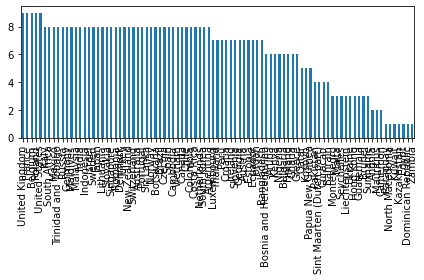

In [ ]:
cron['Entity'].value_counts().plot.bar()
plt.tight_layout()
plt.show()
# visualisasi dengan matplotlib

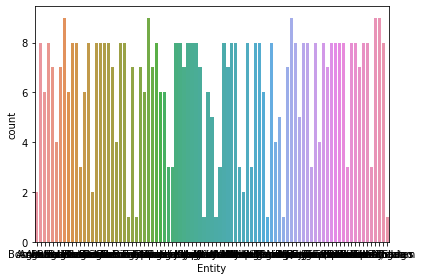

In [ ]:
sns.countplot(data=cron, x='Entity')
plt.tight_layout()
# visualisasi dengan seaborn

Line Plot

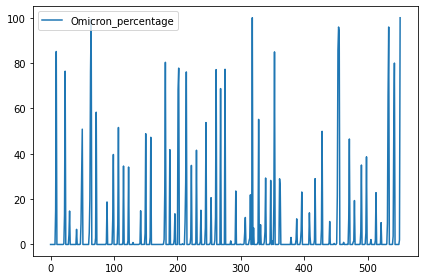

In [ ]:
cron.plot()
plt.tight_layout()

In [ ]:
cron = cron.dropna()

In [ ]:
y = cron['Omicron_percentage']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
547      0.0
548      0.0
549      0.0
550      2.0
551    100.0
Name: Omicron_percentage, Length: 552, dtype: float64

In [ ]:
features = ['Omicron_percentage']
X = cron[features]
X

,Omicron_percentage
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
547,0.0
548,0.0
549,0.0
550,2.0


In [ ]:
X.describe()

,Omicron_percentage
count,552.000000
mean,5.925054
std,17.723560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.152500
max,100.000000


In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
cron = DecisionTreeRegressor(random_state=1)

In [ ]:
cron.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
cron.predict(X.head())

array([0., 0., 0., 0., 0.])

In [ ]:
X.head()

,Omicron_percentage
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Omicron_percentage, dtype: float64

In [ ]:
import numpy as np
np.random.seed(0)

for _ in range(10):
    print(np.random.randint(10))

5
0
3
3
7
9
3
5
2
4


**Evaluasi mode**

In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:

omi = cron.predict(X) 
mean_absolute_error(y, omi)

0.0

Training dan Testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

In [ ]:
cron = DecisionTreeRegressor(random_state=1) # konfigurasi dan training model
cron.fit(X_train, y_train)

In [ ]:
omi = cron.predict(X_test) # Evaluasi model
mean_absolute_error(y_test, omi)

0.11957831325301199

**Optimasi Model**

In [ ]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    omi = model.predict(X_test)
    mae = mean_absolute_error(y_test, omi)
    return mae

Membandingkan MAE dengan beberapa nilai max_leaf_nodes untuk menemukan jumlah leaf paling optimum

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 1
Max leaf nodes: 50 	 Mean Absolute Error: 0
Max leaf nodes: 500 	 Mean Absolute Error: 0
Max leaf nodes: 5000 	 Mean Absolute Error: 0


**Ekplorasi dengan Random Forrest** </br>
Membangun machine learning model dengan Random Forrest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=1)
rfr.fit(X_train, y_train)
omi = rfr.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, omi))}')

Mean Absolute Error: 0
